In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from FastGomokuBoard import FastGomokuBoard as Board
from FwdLookingPolicy import FwdLookingPolicy
from FwdLookingAgent import FwdLookingAgent as Agent
from GomokuTools2 import Heuristics, Reasoner

In [3]:
A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T = 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19

In [4]:
board = Board.from_csv("FwdLookingStudy.csv", size=19, disp_width=10 )
#board.undo()

In [5]:
p = FwdLookingPolicy(board)

In [6]:
agent = Agent(board, depth=6)

IndexError: invalid index to scalar variable.

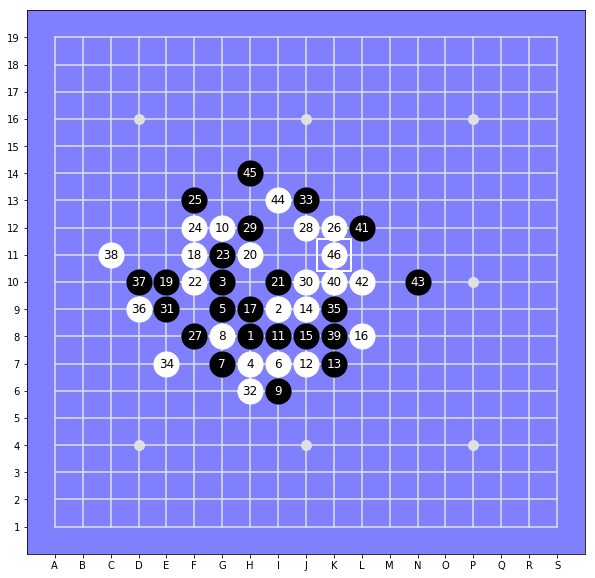

In [7]:
board.display()

In [10]:
top10 = board.top(10)
top10

[['w', (13, 9), (8, 0, 2), 18432],
 ['w', (11, 13), (5, 2, 6), 1312],
 ['b', (11, 6), (5, 1, 6), 1304],
 ['w', (14, 8), (5, 1, 6), 1296],
 ['b', (11, 5), (5, 0, 6), 1288],
 ['w', (11, 14), (5, 0, 6), 1280],
 ['b', (5, 12), (4, 2, 6), 1064],
 ['w', (12, 9), (4, 2, 6), 1056],
 ['b', (15, 9), (4, 1, 6), 1048],
 ['b', (11, 13), (4, 1, 6), 1048]]

---
### Board valuation KPIs

The sum of all non-critical positions valuations. A strategic number that matters if everything else is ambivalent.

Maximum Criticality 

The number of all critical positions

In [27]:
def board_value(scores):
    reasoner = Reasoner(scores, 'b')
    
    return {
        'fatal': [reasoner.i_can_win_now()[0], reasoner.i_will_lose()],
        'num_threats': [len([s for s in scores 
                             if s[0]==c and s[2][2]<6]) 
                        for c in ['b', 'w']],
        'max_critical': [np.max([score[3] for score in scores 
                                 if score[0]==c]) 
                         for c in ['b', 'w']],
        'sum_scores': [np.sum([score[3] for score in scores 
                               if score[0]==c and score[2][2]==6]) 
                       for c in ['b', 'w']]        
    }
    

In [28]:
scores = board.collect_scores()
board_value(scores)

{'fatal': [False, False],
 'num_threats': [0, 1],
 'max_critical': [1304, 18432],
 'sum_scores': [60256, 56848]}

In [40]:
def compare_evaluations(v_before, v_after):
    """
    v1 must not be fatal for black or white
    """
    if v_after['fatal'][0]:
        return True, {'fatal': True}
    if v_after['fatal'][1]:
        return False, {'fatal': True}

    
    nt_gain = (v_after['num_threats'][0] - v_after['num_threats'][1] -
               (v_before['num_threats'][0] - v_before['num_threats'][1]))
    mc_gain = (v_after['max_critical'][0] - v_after['max_critical'][1] -
               (v_before['max_critical'][0] - v_before['max_critical'][1]))
    ss_gain = (v_after['sum_scores'][0] - v_after['sum_scores'][1] -
               (v_before['sum_scores'][0] - v_before['sum_scores'][1]))
    
    gains = {
        'fatal': False,
        'num_threats': nt_gain,
        'max_critical': mc_gain,
        'sum_scores': ss_gain
    }
    
    if nt_gain > 0:
        return True, gains
    elif nt_gain == 0:
        if mc_gain > 0:
            return True, gains
        elif mc_gain == 0:
            if ss_gain > 0:
                return True, gains
    
    return False, gains

In [43]:
def evaluate_move(board, move):
    scores = board.collect_scores()
    v1 = board_value(scores)
    board.set(*move)
    adversary = board.top(1)[0][1]
    board.set(*adversary)
    scores = board.collect_scores()
    v2 = board_value(scores)
    board.display()
    board.undo()
    board.undo()
    return compare_evaluations(v1, v2)

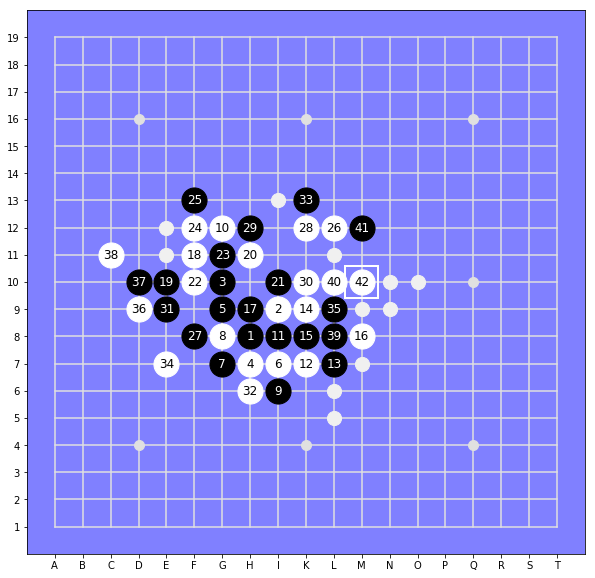

In [50]:
board = Board.from_csv("FwdLookingStudy.csv", size=19, disp_width=10 )
board.undo().undo().undo().undo().display()

In [51]:
board.top(4)

[['b', (11, 6), (5, 1, 6), 1304],
 ['w', (14, 10), (5, 1, 6), 1296],
 ['w', (13, 10), (5, 1, 6), 1296],
 ['b', (11, 5), (5, 0, 6), 1288]]

(False,
 {'fatal': False, 'num_threats': 0, 'max_critical': -16, 'sum_scores': 4056})

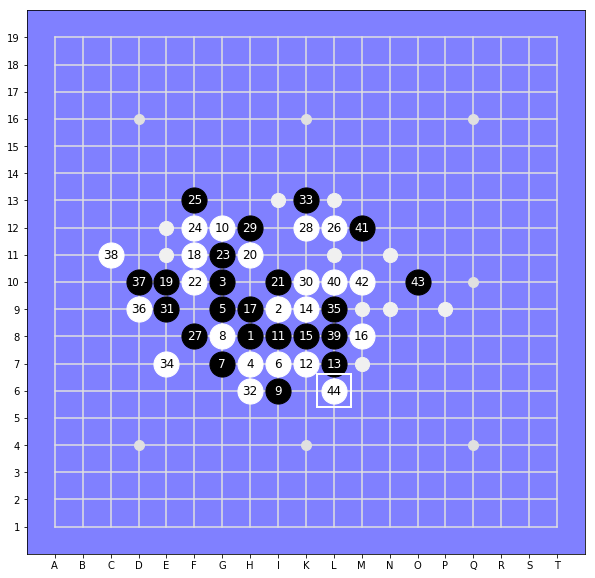

In [48]:
evaluate_move(board, (O, 10))

In [15]:
Reasoner(scores, 'b').suggest()

[['w', (13, 9), (8, 0, 2), 18432]]